# Penjualan sepeda motor bekas

In [172]:
# Import libraries yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [173]:
# Load dataset
data = pd.read_csv('penjualan_sepeda_motor.csv')

In [174]:
# Tampilkan 5 baris pertama data untuk melihat isinya
data.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


In [175]:
# Cek apakah ada nilai kosong
print("Missing values:\n", data.isnull().sum())

Missing values:
 model          0
tahun          0
harga          0
transmisi      0
odometer       0
jenis          0
pajak          0
konsumsiBBM    0
mesin          1
dtype: int64


In [176]:
# Drop baris dengan nilai kosong
data_cleaned = data.dropna()

In [177]:
# Drop missing values dan buat salinan eksplisit
data_cleaned = data.dropna().copy()

In [178]:
# Konversi variabel kategorikal ke numerik menggunakan one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['transmisi', 'jenis'], drop_first=True)

In [179]:
# Tampilkan data yang sudah diproses
data_cleaned.head()

,model,tahun,harga,transmisi,odometer,jenis,pajak,konsumsiBBM,mesin
0,Supra X 125,2017,7999,Manual,17307,Bebek,145.0,58.9,125.0
1,Vario 125,2016,14499,Automatic,25233,Skuter,235.0,43.5,125.0
2,Vario 125,2016,11399,Automatic,37877,Skuter,30.0,61.7,125.0
3,Revo,2016,6499,Manual,23789,Bebek,20.0,60.1,110.0
4,PCX,2015,10199,Automatic,33177,Skuter,160.0,51.4,150.0


In [180]:
# Tampilkan informasi statistik dasar
print(data_cleaned.describe())

             tahun         harga       odometer       pajak  konsumsiBBM  \
count   198.000000    198.000000     198.000000  198.000000   198.000000   
mean   2016.611111  11359.181818   23521.808081  110.757576    53.546465   
std       1.714459   4531.462653   15710.807489   63.555258    10.706631   
min    2011.000000   3799.000000    1391.000000    0.000000    28.000000   
25%    2016.000000   7995.750000   12678.500000   30.000000    44.800000   
50%    2017.000000  10849.000000   21135.500000  145.000000    56.500000   
75%    2018.000000  14498.000000   32165.000000  145.000000    60.100000   
max    2019.000000  34998.000000  119050.000000  300.000000    78.500000   

            mesin  
count  198.000000  
mean   123.914141  
std     16.821177  
min      0.000000  
25%    110.000000  
50%    125.000000  
75%    125.000000  
max    150.000000  


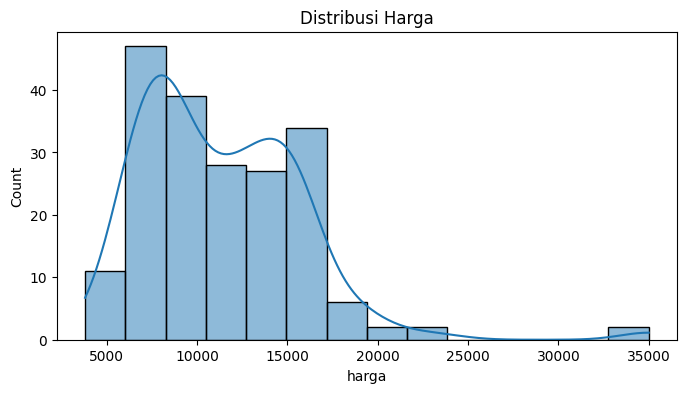

In [181]:
# Visualisasi distribusi harga
plt.figure(figsize=(8, 4))
sns.histplot(data_cleaned['harga'], kde=True)
plt.title('Distribusi Harga')
plt.show()

In [182]:
# Definisikan fitur (X) dan target (y)
X = data_encoded[['tahun', 'odometer', 'pajak', 'konsumsiBBM', 'mesin', 'transmisi_Manual', 'jenis_Skuter']]
y = data_encoded['harga']

In [183]:
# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
# Inisialisasi model regresi linear dan random forest
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

In [185]:
# Latih model
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [186]:
# Tampilkan hasil evaluasi
print("Linear Regression - MSE:", mse_lin, "R²:", r2_lin)
print("Random Forest - MSE:", mse_rf, "R²:", r2_rf)

Linear Regression - MSE: 9826892.56532251 R²: 0.6711859893734572
Random Forest - MSE: 6560281.5814925 R²: 0.7804888490119366


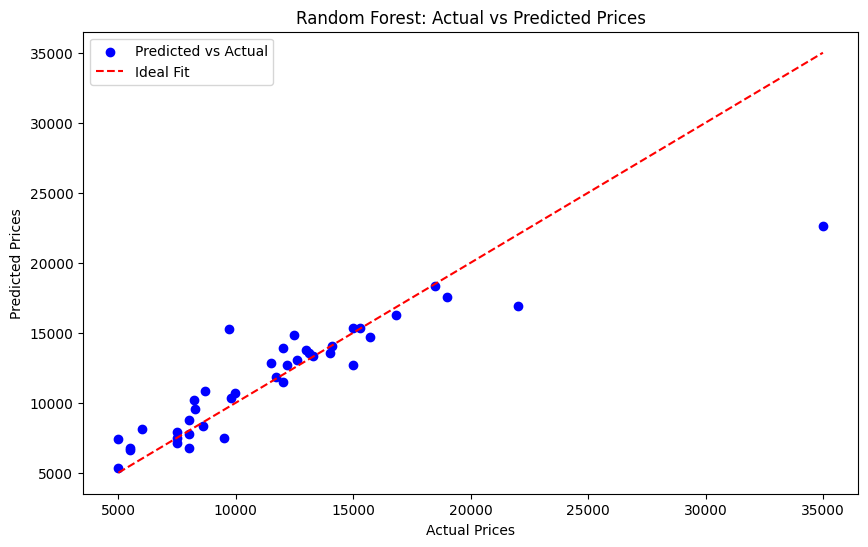

In [187]:
# Scatter plot untuk membandingkan prediksi dan nilai sebenarnya (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.legend()
plt.show()